# Analysis - Funding, Funding Partners and Implementing partners in Mozambique from 2016 to 2024 (The Health Partners Group in Mozambique has compiled this list to facilitate communication and collaboration.)

# Step 1: Data Cleaning

## 1. Data Overview, Import Libraries, Load Dataset, understand etc
HPG - The Health Partners Group has compiled this list to facilitate communication and collaboration. Information may change, including financial and project location information. Users should independently verify all information before relying on it for decision-making purposes. Also note that this list includes only current projects, and excludes humanitarian projects.

```
# This is formatted as code
```



### 1.1 Importing Libraries and Loading Dataset

In [ ]:
#import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install forex-python
from forex_python.converter import CurrencyRates

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 9.2 MB/s eta 0:00:00


In [ ]:
# i have downloaded the dataset im gonna use today. If you want this dataset, please visit this link to get it: "https://airtable.com/appxtAORRsJnCzZzJ/tbltG2FWrHZLm7bsO/viwGBlm2uYqMNfuvK?blocks=hide"

df = pd.read_csv("/content/HPG Project List-Grid view.csv")
df.head()

,Name of Project,Funding Partner,Implementing Partner Name,Currency,Total Value of Project,Year Started,Year Ending (Estimate),Did Partner specify districts?,Maputo City,Maputo Province,...,Sofala,Tete,Zambezia,Cabo Delgado,Nampula,Niassa,Notes,URL,Contact,Last Modified
0,Construção e Equipamento dos Hospitais Distrit...,Arab Bank for Economic Development in Africa,Arab Bank for Economic Development in Africa,USD,20000000,2024.0,2028,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Mecanhelas,N'gauma",NaN,NaN,dzaqueu@hotmail.com,5/27/2024 5:08pm
1,Fundação Manhiça,Bill and Melinda Gates Foundation,Fundação Manhiça,USD,6999728,2024.0,2027,Yes,NaN,Manhiça,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.gatesfoundation.org/about/committe...,AnaLeticia.Nery@gatesfoundation.org,5/22/2024 8:57am
2,Instituto Nacional de Saúde,Bill and Melinda Gates Foundation,Instituto Nacional de Saúde\n,USD,889794,2023.0,2026,Yes,NaN,Marracuene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.gatesfoundation.org/about/committe...,AnaLeticia.Nery@gatesfoundation.org,5/27/2024 5:08pm
3,Polio,Bill and Melinda Gates Foundation,WHO,USD,1400000,2023.0,2025,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,erbf@who.int,5/27/2024 5:08pm
4,Strengthening malaria data and digital health ...,Bill and Melinda Gates Foundation,CHAI,USD,8544257,2022.0,2024,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.gatesfoundation.org/about/committe...,AnaLeticia.Nery@gatesfoundation.org,5/27/2024 5:08pm


### 1.2 Understand this dataset

In [ ]:
df.shape #this dataset has 153 rows and 23 columns

(152, 23)

In [ ]:
df['Currency'].unique() #we have different currencies here. we have to convert all to USD for easy readiblity. Using todays exchange rate.

array(['USD', 'CAD', 'EUR', 'MZN', 'NOK', 'SEK', 'GBP'], dtype=object)

In [ ]:
df.describe() # statistical view of the Dataset

,Total Value of Project,Year Started,Year Ending (Estimate)
count,1.520000e+02,144.000000,152.000000
mean,3.503041e+07,2021.944444,2025.625000
std,1.190906e+08,1.667366,1.326313
min,4.200000e+04,2016.000000,2023.000000
25%,1.927350e+06,2021.000000,2025.000000
50%,6.212500e+06,2022.000000,2026.000000
75%,2.000000e+07,2023.000000,2026.000000
max,1.250000e+09,2024.000000,2030.000000


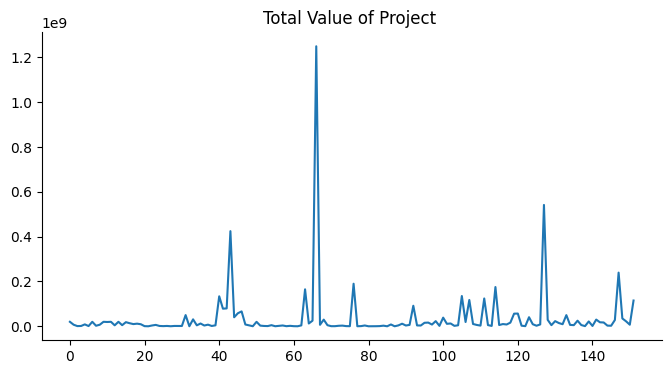

In [ ]:
df['Total Value of Project '].plot(kind='line', figsize=(8, 4), title='Total Value of Project ')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name of Project                 152 non-null    object 
 1   Funding Partner                 152 non-null    object 
 2   Implementing Partner Name       152 non-null    object 
 3   Currency                        152 non-null    object 
 4   Total Value of Project          152 non-null    int64  
 5   Year Started                    144 non-null    float64
 6   Year Ending (Estimate)          152 non-null    int64  
 7   Did Partner specify districts?  152 non-null    object 
 8   Maputo City                     30 non-null     object 
 9   Maputo Province                 30 non-null     object 
 10  Gaza                            23 non-null     object 
 11  Inhambane                       24 non-null     object 
 12  Manica                          27 n

--- We have subset the columns and rows we will need for this analysis. Also we have to change some data types such as year = datetime. Also i noticed some of the total of value of projects are in Euros, we have to convert all to USD

### 1.2 Checking for Missing Values and Handling them

In [ ]:
# Lets check the overall missing values

df.isna().sum()

,0
Name of Project,0
Funding Partner,0
Implementing Partner Name,0
Currency,0
Total Value of Project,0
Year Started,8
Year Ending (Estimate),0
Did Partner specify districts?,0
Maputo City,122
Maputo Province,122


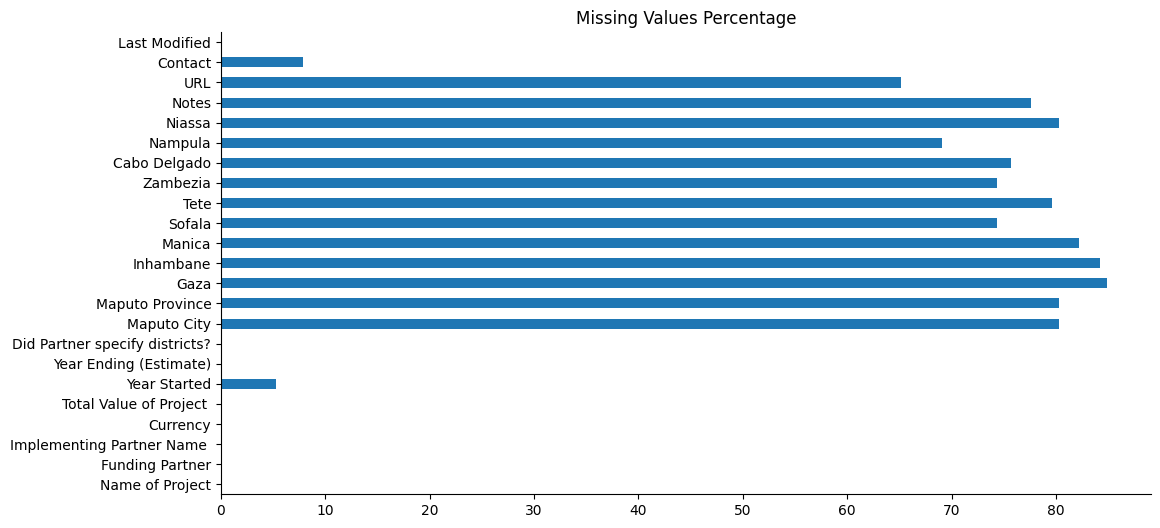

In [ ]:
## show a chart of this missing values (%) --> to visualize them better
missing_values = df.isna().sum()
missing_values_percentage = (missing_values / len(df)) * 100

#viz -> missing values
missing_values_percentage.plot(kind='barh', figsize=(12, 6), title='Missing Values Percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

Observation:: From the Horizontal bar graph, the missing values are more on the Provinces. For reference, the provinces contains specified districts for the funded projects to be executed. So, for better understanding, i think we should find a better way to show the districts..

In [ ]:
## lets see the missing values in the year started

dataset_with_no_start_date = df[df['Year Started'].isna()]
dataset_with_no_start_date  # projects with no start date. We might have to remove it or use an average of the Start year( which is 2021)

,Name of Project,Funding Partner,Implementing Partner Name,Currency,Total Value of Project,Year Started,Year Ending (Estimate),Did Partner specify districts?,Maputo City,Maputo Province,...,Sofala,Tete,Zambezia,Cabo Delgado,Nampula,Niassa,Notes,URL,Contact,Last Modified
19,ACT-A-HAC,Canada,UNICEF,USD,9134193,NaN,2025,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,trish.chang@international.gc.ca,5/27/2024 5:09pm
22,Nutrition,European Commission,UNICEF,USD,3592093,NaN,2025,Yes,NaN,NaN,...,"Buzi,Caia,Nhamatanda,Dondo",NaN,NaN,NaN,NaN,NaN,NaN,NaN,hmuhammad@unicef.org,5/22/2024 11:25am
61,Stabilisation Support to Palma District,Italy -AICS,UNICEF,USD,156045,NaN,2024,Yes,NaN,NaN,...,NaN,NaN,NaN,Palma,NaN,NaN,NaN,NaN,laura.porcellato@aics.gov.it,5/22/2024 11:26am
80,Accelerating global focus on NCDs and PEN Plus...,UNICEF HQ/Thematic Funds/NatComs),UNICEF,USD,86735,NaN,2025,Yes,NaN,NaN,...,Nhamatanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hmuhammad@unicef.org,5/22/2024 11:24am
81,Enabling and Enhancing Early Childhood Develop...,UNICEF HQ/Thematic Funds/NatComs),UNICEF,USD,155948,NaN,2026,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hmuhammad@unicef.org,5/22/2024 11:24am
82,HIV and AIDS Thematic Fund,UNICEF HQ/Thematic Funds/NatComs),UNICEF,USD,365870,NaN,2026,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hmuhammad@unicef.org,5/22/2024 11:24am
83,Nutrition,UNICEF HQ/Thematic Funds/NatComs),UNICEF,USD,846000,NaN,2026,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hmuhammad@unicef.org,5/22/2024 11:24am
84,Surge Polio,UNICEF HQ/Thematic Funds/NatComs),UNICEF,USD,2754189,NaN,2025,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hmuhammad@unicef.org,5/22/2024 11:24am


In [ ]:
df.head()

,Name of Project,Funding Partner,Implementing Partner Name,Currency,Total Value of Project,Year Started,Year Ending (Estimate),Did Partner specify districts?,Maputo City,Maputo Province,...,Sofala,Tete,Zambezia,Cabo Delgado,Nampula,Niassa,Notes,URL,Contact,Last Modified
0,Construção e Equipamento dos Hospitais Distrit...,Arab Bank for Economic Development in Africa,Arab Bank for Economic Development in Africa,USD,20000000,2024.0,2028,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Mecanhelas,N'gauma",NaN,NaN,dzaqueu@hotmail.com,5/27/2024 5:08pm
1,Fundação Manhiça,Bill and Melinda Gates Foundation,Fundação Manhiça,USD,6999728,2024.0,2027,Yes,NaN,Manhiça,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.gatesfoundation.org/about/committe...,AnaLeticia.Nery@gatesfoundation.org,5/22/2024 8:57am
2,Instituto Nacional de Saúde,Bill and Melinda Gates Foundation,Instituto Nacional de Saúde\n,USD,889794,2023.0,2026,Yes,NaN,Marracuene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.gatesfoundation.org/about/committe...,AnaLeticia.Nery@gatesfoundation.org,5/27/2024 5:08pm
3,Polio,Bill and Melinda Gates Foundation,WHO,USD,1400000,2023.0,2025,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,erbf@who.int,5/27/2024 5:08pm
4,Strengthening malaria data and digital health ...,Bill and Melinda Gates Foundation,CHAI,USD,8544257,2022.0,2024,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.gatesfoundation.org/about/committe...,AnaLeticia.Nery@gatesfoundation.org,5/27/2024 5:08pm


In [ ]:
## Lets check if there duplicate project names... Ensure each project is unique.

df['Name of Project'].duplicated().sum()  ## after carefull viewing of the dataset,there are project names that were funded more once, and they were implemented by different partners.

14

### 1.3 Standardize Data
- We need to convert the years into datetime format.
- convert all foreign currency to USD and MZN
- Reshape our dataset and create a district column
- create unique project names to avoid confusion during analysis.

In [ ]:
## copy the instance for safe keeping

df_sd = df.copy()

In [ ]:
df_sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name of Project                 152 non-null    object 
 1   Funding Partner                 152 non-null    object 
 2   Implementing Partner Name       152 non-null    object 
 3   Currency                        152 non-null    object 
 4   Total Value of Project          152 non-null    int64  
 5   Year Started                    144 non-null    float64
 6   Year Ending (Estimate)          152 non-null    int64  
 7   Did Partner specify districts?  152 non-null    object 
 8   Maputo City                     30 non-null     object 
 9   Maputo Province                 30 non-null     object 
 10  Gaza                            23 non-null     object 
 11  Inhambane                       24 non-null     object 
 12  Manica                          27 n

#### We need to rename some columns and convert the years into datetime format.


In [ ]:
## first we rename the Year Started, Year Ending (Estimate), Total Value of Project
df_sd.rename(columns={'Year Started': 'Start Date', 'Year Ending (Estimate)': 'Estimated End Date',
                      'Total Value of Project ': 'Total Value'}, inplace=True)


## Convert years to date type
df_sd['Start Date'] = pd.to_datetime(df_sd['Start Date'], format='%Y')
df_sd['Estimated End Date'] = pd.to_datetime(df_sd['Estimated End Date'], format='%Y')


df_sd.head()

,Name of Project,Funding Partner,Implementing Partner Name,Currency,Total Value,Start Date,Estimated End Date,Did Partner specify districts?,Maputo City,Maputo Province,...,Sofala,Tete,Zambezia,Cabo Delgado,Nampula,Niassa,Notes,URL,Contact,Last Modified
0,Construção e Equipamento dos Hospitais Distrit...,Arab Bank for Economic Development in Africa,Arab Bank for Economic Development in Africa,USD,20000000,2024-01-01,2028-01-01,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Mecanhelas,N'gauma",NaN,NaN,dzaqueu@hotmail.com,5/27/2024 5:08pm
1,Fundação Manhiça,Bill and Melinda Gates Foundation,Fundação Manhiça,USD,6999728,2024-01-01,2027-01-01,Yes,NaN,Manhiça,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.gatesfoundation.org/about/committe...,AnaLeticia.Nery@gatesfoundation.org,5/22/2024 8:57am
2,Instituto Nacional de Saúde,Bill and Melinda Gates Foundation,Instituto Nacional de Saúde\n,USD,889794,2023-01-01,2026-01-01,Yes,NaN,Marracuene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.gatesfoundation.org/about/committe...,AnaLeticia.Nery@gatesfoundation.org,5/27/2024 5:08pm
3,Polio,Bill and Melinda Gates Foundation,WHO,USD,1400000,2023-01-01,2025-01-01,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,erbf@who.int,5/27/2024 5:08pm
4,Strengthening malaria data and digital health ...,Bill and Melinda Gates Foundation,CHAI,USD,8544257,2022-01-01,2024-01-01,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.gatesfoundation.org/about/committe...,AnaLeticia.Nery@gatesfoundation.org,5/27/2024 5:08pm


### Tackling missing values in Start Year

In [ ]:
# to tackle this, lets fill the missing values with the mean of the Start year

# Calculate the mean of 'Start Date' (excluding NaN values)
mean_start_date = df_sd['Start Date'].dropna().mean()

# # Fill NaN values with the calculated mean
df_sd['Start Date'] = df_sd['Start Date'].fillna(mean_start_date)

df_sd.head()

,Name of Project,Funding Partner,Implementing Partner Name,Currency,Total Value,Start Date,Estimated End Date,Did Partner specify districts?,Maputo City,Maputo Province,...,Sofala,Tete,Zambezia,Cabo Delgado,Nampula,Niassa,Notes,URL,Contact,Last Modified
0,Construção e Equipamento dos Hospitais Distrit...,Arab Bank for Economic Development in Africa,Arab Bank for Economic Development in Africa,USD,20000000,2024-01-01,2028-01-01,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Mecanhelas,N'gauma",NaN,NaN,dzaqueu@hotmail.com,5/27/2024 5:08pm
1,Fundação Manhiça,Bill and Melinda Gates Foundation,Fundação Manhiça,USD,6999728,2024-01-01,2027-01-01,Yes,NaN,Manhiça,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.gatesfoundation.org/about/committe...,AnaLeticia.Nery@gatesfoundation.org,5/22/2024 8:57am
2,Instituto Nacional de Saúde,Bill and Melinda Gates Foundation,Instituto Nacional de Saúde\n,USD,889794,2023-01-01,2026-01-01,Yes,NaN,Marracuene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.gatesfoundation.org/about/committe...,AnaLeticia.Nery@gatesfoundation.org,5/27/2024 5:08pm
3,Polio,Bill and Melinda Gates Foundation,WHO,USD,1400000,2023-01-01,2025-01-01,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,erbf@who.int,5/27/2024 5:08pm
4,Strengthening malaria data and digital health ...,Bill and Melinda Gates Foundation,CHAI,USD,8544257,2022-01-01,2024-01-01,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.gatesfoundation.org/about/committe...,AnaLeticia.Nery@gatesfoundation.org,5/27/2024 5:08pm


####  convert all foreign currency to USD and MZN

In [ ]:
# check the unique currencies
df_sd['Currency'].unique()

array(['USD', 'CAD', 'EUR', 'MZN', 'NOK', 'SEK', 'GBP'], dtype=object)

In [ ]:
import requests

API_KEY = "741475462d95e6d097c23e7e"  # Get a free key from exchangerate-api.com
BASE_URL = f"https://v6.exchangerate-api.com/v6/{API_KEY}/latest/"

def convert_to_usd(row):
    try:
        currency = str(row['Currency']).strip().upper()
        amount = float(row['Total Value'])

        if currency == 'USD':
            return amount

        response = requests.get(BASE_URL + currency)
        data = response.json()

        if response.status_code == 200 and 'conversion_rates' in data:
            rate = data['conversion_rates'].get('USD')
            if rate:
                return amount * rate

        print(f"Error fetching rate for {currency}")
        return None

    except Exception as e:
        print(f"Error converting {row['Currency']} {row['Total Value']}: {e}")
        return None

df_sd['Total Value (USD)'] = df_sd.apply(convert_to_usd, axis=1)


In [ ]:
df_sd.head(5)

,Name of Project,Funding Partner,Implementing Partner Name,Currency,Total Value,Start Date,Estimated End Date,Did Partner specify districts?,Maputo City,Maputo Province,...,Tete,Zambezia,Cabo Delgado,Nampula,Niassa,Notes,URL,Contact,Last Modified,Total Value (USD)
0,Construção e Equipamento dos Hospitais Distrit...,Arab Bank for Economic Development in Africa,Arab Bank for Economic Development in Africa,USD,20000000,2024-01-01,2028-01-01,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,"Mecanhelas,N'gauma",NaN,NaN,dzaqueu@hotmail.com,5/27/2024 5:08pm,20000000.0
1,Fundação Manhiça,Bill and Melinda Gates Foundation,Fundação Manhiça,USD,6999728,2024-01-01,2027-01-01,Yes,NaN,Manhiça,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.gatesfoundation.org/about/committe...,AnaLeticia.Nery@gatesfoundation.org,5/22/2024 8:57am,6999728.0
2,Instituto Nacional de Saúde,Bill and Melinda Gates Foundation,Instituto Nacional de Saúde\n,USD,889794,2023-01-01,2026-01-01,Yes,NaN,Marracuene,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.gatesfoundation.org/about/committe...,AnaLeticia.Nery@gatesfoundation.org,5/27/2024 5:08pm,889794.0
3,Polio,Bill and Melinda Gates Foundation,WHO,USD,1400000,2023-01-01,2025-01-01,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,erbf@who.int,5/27/2024 5:08pm,1400000.0
4,Strengthening malaria data and digital health ...,Bill and Melinda Gates Foundation,CHAI,USD,8544257,2022-01-01,2024-01-01,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.gatesfoundation.org/about/committe...,AnaLeticia.Nery@gatesfoundation.org,5/27/2024 5:08pm,8544257.0


In [ ]:
# copy for afe keeping
df_usd = df_sd.copy()

#### create a district columns

In [ ]:
df_usd.columns

Index(['Name of Project', 'Funding Partner', 'Implementing Partner Name ',
       'Currency', 'Total Value', 'Start Date', 'Estimated End Date',
       'Did Partner specify districts?', 'Maputo City', 'Maputo Province',
       'Gaza', 'Inhambane', 'Manica', 'Sofala', 'Tete', 'Zambezia',
       'Cabo Delgado', 'Nampula', 'Niassa', 'Notes', 'URL', 'Contact',
       'Last Modified', 'Total Value (USD)'],
      dtype='object')

In [ ]:
# lets reshape the dataset, separate districts

# 1. Select relevant columns (adjust as needed)
provinces = ['Maputo City', 'Maputo Province', 'Gaza', 'Inhambane',  'Sofala', 'Manica', 'Tete', 'Zambezia', 'Nampula', 'Niassa', 'Cabo Delgado']  # Add all your province columns
id_vars = ["Name of Project", "Funding Partner", "Implementing Partner Name ","Currency", "Total Value", "Total Value (USD)", "Start Date", "Estimated End Date", "Did Partner specify districts?"]  # Adjust if you need other id columns

# 2. Melt the DataFrame
df_melted = df_usd.melt(id_vars=id_vars,
                     value_vars=provinces,
                     var_name="Province",
                     value_name="District")



# # 3. Fill the empty districts cell with "Not Specified"
# df_melted['District'] = df_melted['District'].fillna('Not Specified')
df_melted.head()


,Name of Project,Funding Partner,Implementing Partner Name,Currency,Total Value,Total Value (USD),Start Date,Estimated End Date,Did Partner specify districts?,Province,District
0,Construção e Equipamento dos Hospitais Distrit...,Arab Bank for Economic Development in Africa,Arab Bank for Economic Development in Africa,USD,20000000,20000000.0,2024-01-01,2028-01-01,Yes,Maputo City,NaN
1,Fundação Manhiça,Bill and Melinda Gates Foundation,Fundação Manhiça,USD,6999728,6999728.0,2024-01-01,2027-01-01,Yes,Maputo City,NaN
2,Instituto Nacional de Saúde,Bill and Melinda Gates Foundation,Instituto Nacional de Saúde\n,USD,889794,889794.0,2023-01-01,2026-01-01,Yes,Maputo City,NaN
3,Polio,Bill and Melinda Gates Foundation,WHO,USD,1400000,1400000.0,2023-01-01,2025-01-01,No,Maputo City,NaN
4,Strengthening malaria data and digital health ...,Bill and Melinda Gates Foundation,CHAI,USD,8544257,8544257.0,2022-01-01,2024-01-01,No,Maputo City,NaN


#### create unique project names to avoid confusion during analysis.

As mentioned earlier, there are project names that are smiliar but they are different projects. lets give them a unique identifier. Like "Project name + implementing partner"

In [ ]:
# Create Unique names to avoid duplicates in The Name of the project

df_melted['Unique Project Name'] = df_melted['Name of Project'] +' ' + '--' + ' '+ df_melted['Implementing Partner Name ']

df_melted['Unique Project Name']

,Unique Project Name
0,Construção e Equipamento dos Hospitais Distrit...
1,Fundação Manhiça -- Fundação Manhiça
2,Instituto Nacional de Saúde -- Instituto Nacio...
3,Polio -- WHO
4,Strengthening malaria data and digital health ...
...,...
1667,ECHO - EFFICIENCIES FOR CLINICAL HIV OUTCOMES ...
1668,USAID HIV Key & Populations (KPP)/PASSOS+ -- C...
1669,Manica OVC Local project (ANDA) -- Associação ...
1670,SUPPORT TO THE NATIONAL COUNCIL\nTO COMBAT HIV...


### Subsetting of columns needed for visualization

In [ ]:
df_reshaped = df_melted[['Unique Project Name','Funding Partner', 'Implementing Partner Name ','Total Value (USD)', 'Start Date',
       'Estimated End Date', 'Did Partner specify districts?', 'Province',
       'District']]
df_reshaped.head()

,Unique Project Name,Funding Partner,Implementing Partner Name,Total Value (USD),Start Date,Estimated End Date,Did Partner specify districts?,Province,District
0,Construção e Equipamento dos Hospitais Distrit...,Arab Bank for Economic Development in Africa,Arab Bank for Economic Development in Africa,20000000.0,2024-01-01,2028-01-01,Yes,Maputo City,NaN
1,Fundação Manhiça -- Fundação Manhiça,Bill and Melinda Gates Foundation,Fundação Manhiça,6999728.0,2024-01-01,2027-01-01,Yes,Maputo City,NaN
2,Instituto Nacional de Saúde -- Instituto Nacio...,Bill and Melinda Gates Foundation,Instituto Nacional de Saúde\n,889794.0,2023-01-01,2026-01-01,Yes,Maputo City,NaN
3,Polio -- WHO,Bill and Melinda Gates Foundation,WHO,1400000.0,2023-01-01,2025-01-01,No,Maputo City,NaN
4,Strengthening malaria data and digital health ...,Bill and Melinda Gates Foundation,CHAI,8544257.0,2022-01-01,2024-01-01,No,Maputo City,NaN


There are missing values in the district columns because SOme funding partners didnt specify districts for the funding..

so we are going replace the empty cells with "Not Specified". this shows that the districts where not specified.

In [ ]:
# fill missing values in district column with "Not Specified"

df_reshaped['District'] = df_reshaped['District'].fillna('Not Specified')
df_reshaped.head()

<ipython-input-27-2f03e7153d0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reshaped['District'] = df_reshaped['District'].fillna('Not Specified')


,Unique Project Name,Funding Partner,Implementing Partner Name,Total Value (USD),Start Date,Estimated End Date,Did Partner specify districts?,Province,District
0,Construção e Equipamento dos Hospitais Distrit...,Arab Bank for Economic Development in Africa,Arab Bank for Economic Development in Africa,20000000.0,2024-01-01,2028-01-01,Yes,Maputo City,Not Specified
1,Fundação Manhiça -- Fundação Manhiça,Bill and Melinda Gates Foundation,Fundação Manhiça,6999728.0,2024-01-01,2027-01-01,Yes,Maputo City,Not Specified
2,Instituto Nacional de Saúde -- Instituto Nacio...,Bill and Melinda Gates Foundation,Instituto Nacional de Saúde\n,889794.0,2023-01-01,2026-01-01,Yes,Maputo City,Not Specified
3,Polio -- WHO,Bill and Melinda Gates Foundation,WHO,1400000.0,2023-01-01,2025-01-01,No,Maputo City,Not Specified
4,Strengthening malaria data and digital health ...,Bill and Melinda Gates Foundation,CHAI,8544257.0,2022-01-01,2024-01-01,No,Maputo City,Not Specified


In [ ]:
# Export this current dataset - AFter cleanining and preparation. We use this for visualizations

df_reshaped.to_csv('cleaned_dataset_viz.csv', index=False)

In [ ]:
def count_projects_per_province(df):
    """
    Counts the number of projects in each province, considering the 'Did Partner specify districts?' column.
    """
    province_counts = {}
    for province in df['Province'].unique():
        province_df = df[df['Province'] == province]
        count = 0
        for index, row in province_df.iterrows():
            if row['Did Partner specify districts?'] == 'Yes':
                if row['District'] != 'Not Specified':
                    count += 1
            elif row['Did Partner specify districts?'] == 'No':
                count += 1
        province_counts[province] = count
    return province_counts
project_counts = count_projects_per_province(df_reshaped)
project_counts

{'Maputo City': 71,
 'Maputo Province': 71,
 'Gaza': 64,
 'Inhambane': 65,
 'Sofala': 80,
 'Manica': 68,
 'Tete': 72,
 'Zambezia': 80,
 'Nampula': 88,
 'Niassa': 71,
 'Cabo Delgado': 78}

### Prepare dataset for map

In [ ]:
# prompt: This is good..
# can we add more information from the dataset into this one and make it a dataframe
# what i meant is adding the number of projects per province in the dataframe as well using this function (# prompt: i like what you did but its not correct..
# # if the "Did Partner specify districts? = yes" and the district is = "Not Specified", then that project was not performed in that particular province.
# # but if the "Did Partner specify districts? = No", then the project was performed in all provinces.
# # use this to calculate how many projects in each province
# # Assuming 'df_reshaped' is your DataFrame from the previous code.
# def count_projects_per_province(df):
#     """
#     Counts the number of projects in each province, considering the 'Did Partner specify districts?' column.
#     """
#     province_counts = {}
#     for province in df['Province'].unique():
#         province_df = df[df['Province'] == province]
#         count = 0
#         for index, row in province_df.iterrows():
#             if row['Did Partner specify districts?'] == 'Yes':
#                 if row['District'] != 'Not Specified':
#                     count += 1
#             elif row['Did Partner specify districts?'] == 'No':
#                 count += 1
#         province_counts[province] = count
#     return province_counts
# project_counts = count_projects_per_province(df_reshaped)
# project_counts
#  )



# Assuming 'df_reshaped' is your DataFrame from the previous code.
def count_projects_per_province(df):
    """
    Counts the number of projects in each province, considering the 'Did Partner specify districts?' column.
    """
    province_counts = {}
    for province in df['Province'].unique():
        province_df = df[df['Province'] == province]
        count = 0
        for index, row in province_df.iterrows():
            if row['Did Partner specify districts?'] == 'Yes':
                if row['District'] != 'Not Specified':
                    count += 1
            elif row['Did Partner specify districts?'] == 'No':
                count += 1
        province_counts[province] = count
    return province_counts

project_counts = count_projects_per_province(df_reshaped)

# Convert the project counts to a DataFrame
project_counts_df = pd.DataFrame(list(project_counts.items()), columns=['Province', 'Project Count'])

# Merge the project counts with the original DataFrame
df_final = pd.merge(df_reshaped, project_counts_df, on='Province', how='left')

print(df_final.head())


                                 Unique Project Name  \
0  Construção e Equipamento dos Hospitais Distrit...   
1               Fundação Manhiça -- Fundação Manhiça   
2  Instituto Nacional de Saúde -- Instituto Nacio...   
3                                       Polio -- WHO   
4  Strengthening malaria data and digital health ...   

                                Funding Partner  \
0  Arab Bank for Economic Development in Africa   
1             Bill and Melinda Gates Foundation   
2             Bill and Melinda Gates Foundation   
3             Bill and Melinda Gates Foundation   
4             Bill and Melinda Gates Foundation   

                     Implementing Partner Name   Total Value (USD) Start Date  \
0  Arab Bank for Economic Development in Africa         20000000.0 2024-01-01   
1                              Fundação Manhiça          6999728.0 2024-01-01   
2                 Instituto Nacional de Saúde\n           889794.0 2023-01-01   
3                               

In [ ]:
df_final

,Unique Project Name,Funding Partner,Implementing Partner Name,Total Value (USD),Start Date,Estimated End Date,Did Partner specify districts?,Province,District,Project Duration,Number of Projects,Project Count
0,Construção e Equipamento dos Hospitais Distrit...,Arab Bank for Economic Development in Africa,Arab Bank for Economic Development in Africa,20000000.0,2024-01-01,2028-01-01,Yes,Maputo City,Not Specified,1461,149,71
1,Fundação Manhiça -- Fundação Manhiça,Bill and Melinda Gates Foundation,Fundação Manhiça,6999728.0,2024-01-01,2027-01-01,Yes,Maputo City,Not Specified,1096,149,71
2,Instituto Nacional de Saúde -- Instituto Nacio...,Bill and Melinda Gates Foundation,Instituto Nacional de Saúde\n,889794.0,2023-01-01,2026-01-01,Yes,Maputo City,Not Specified,1096,149,71
3,Polio -- WHO,Bill and Melinda Gates Foundation,WHO,1400000.0,2023-01-01,2025-01-01,No,Maputo City,Not Specified,731,149,71
4,Strengthening malaria data and digital health ...,Bill and Melinda Gates Foundation,CHAI,8544257.0,2022-01-01,2024-01-01,No,Maputo City,Not Specified,730,149,71
...,...,...,...,...,...,...,...,...,...,...,...,...
1667,ECHO - EFFICIENCIES FOR CLINICAL HIV OUTCOMES ...,"USAID,PEPFAR",ABT Associates,239552897.0,2019-01-01,2026-01-01,Yes,Cabo Delgado,Not Specified,2557,149,78
1668,USAID HIV Key & Populations (KPP)/PASSOS+ -- C...,"USAID,PEPFAR",Centro Internacional de Saúde Reproductiva em ...,34997541.0,2022-01-01,2027-01-01,Yes,Cabo Delgado,"Ancuabe,Metuge,Montepuez,Pemba,Chiúre",1826,149,78
1669,Manica OVC Local project (ANDA) -- Associação ...,"USAID,PEPFAR",Associação Nacional para o Desenvolvimento Aut...,22122240.0,2020-01-01,2025-01-01,Yes,Cabo Delgado,Not Specified,1827,149,78
1670,SUPPORT TO THE NATIONAL COUNCIL\nTO COMBAT HIV...,"USAID,PEPFAR",Conselho Nacional de Combate ao\nHIV/SIDA,7000000.0,2019-01-01,2027-01-01,Yes,Cabo Delgado,"Montepuez,Chiúre,Ancuabe,Namuno,Mecufi",2922,149,78


In [ ]:
# prompt: calculate the average using this logic
# # if the "Did Partner specify districts? = yes" and the district is = "Not Specified", then that project was not performed in that particular province.
# # # but if the "Did Partner specify districts? = No", then the project was performed in all provinces.
# # # use this logic

def calculate_average_funding(df):
    """
    Calculates the average funding amount per province based on the provided logic.
    """
    province_funding = {}
    for province in df['Province'].unique():
        province_df = df[df['Province'] == province]
        total_funding = 0
        project_count = 0
        for index, row in province_df.iterrows():
            if row['Did Partner specify districts?'] == 'Yes':
                if row['District'] != 'Not Specified':
                    total_funding += row['Total Value (USD)']
                    project_count += 1
            elif row['Did Partner specify districts?'] == 'No':
                total_funding += row['Total Value (USD)']
                project_count += 1
        if project_count > 0 :
          province_funding[province] = total_funding / project_count
        else:
          province_funding[province] = 0 # Handle cases where project_count is zero to avoid division by zero errors.
    return province_funding

average_funding = calculate_average_funding(df_final)
average_funding


{'Maputo City': 27526937.782460563,
 'Maputo Province': 29583444.760066196,
 'Gaza': 33222378.124787502,
 'Inhambane': 31780614.973618463,
 'Sofala': 29033424.021815002,
 'Manica': 34164146.08803529,
 'Tete': 31482162.174531944,
 'Zambezia': 32510351.47483,
 'Nampula': 27104606.70836364,
 'Niassa': 32607778.906140853,
 'Cabo Delgado': 28577910.414564107}

In [ ]:
df_final['Average Funding'] = df_final['Province'].map(average_funding)
df_final.head()

,Unique Project Name,Funding Partner,Implementing Partner Name,Total Value (USD),Start Date,Estimated End Date,Did Partner specify districts?,Province,District,Project Duration,Number of Projects,Project Count,Average Funding
0,Construção e Equipamento dos Hospitais Distrit...,Arab Bank for Economic Development in Africa,Arab Bank for Economic Development in Africa,20000000.0,2024-01-01,2028-01-01,Yes,Maputo City,Not Specified,1461,149,71,2.752694e+07
1,Fundação Manhiça -- Fundação Manhiça,Bill and Melinda Gates Foundation,Fundação Manhiça,6999728.0,2024-01-01,2027-01-01,Yes,Maputo City,Not Specified,1096,149,71,2.752694e+07
2,Instituto Nacional de Saúde -- Instituto Nacio...,Bill and Melinda Gates Foundation,Instituto Nacional de Saúde\n,889794.0,2023-01-01,2026-01-01,Yes,Maputo City,Not Specified,1096,149,71,2.752694e+07
3,Polio -- WHO,Bill and Melinda Gates Foundation,WHO,1400000.0,2023-01-01,2025-01-01,No,Maputo City,Not Specified,731,149,71,2.752694e+07
4,Strengthening malaria data and digital health ...,Bill and Melinda Gates Foundation,CHAI,8544257.0,2022-01-01,2024-01-01,No,Maputo City,Not Specified,730,149,71,2.752694e+07


In [ ]:
df_final.to_csv('final_dataset.csv', index=False)